# Chemical encoding examples

## Example 1
Example of how to encode a chemical compound as input for a neural network.
* The chemical structure is in SMILES format.
* Use rdkit to calculate the fingerprint and map into a binary vector.

In [1]:
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import SVG

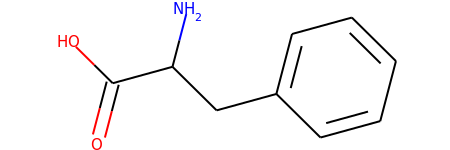

In [2]:
phenylalanine = Chem.MolFromSmiles('NC(Cc1ccccc1)C(O)=O')
phenylalanine

In [3]:
minPath = 1
maxPath = 5
fpSize = 1024
fp = AllChem.RDKFingerprint(phenylalanine, minPath=1, maxPath=maxPath, fpSize=fpSize)
px = [int(x) for x in list(fp.ToBitString())]
px[0:20]

[0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0]

We use **synbioTools** to map the chemical into a tensor of shape fingerprintSize $\times$ depth. The resulting matrix can be visualized using matplotlib.

In [22]:
from synbioTools import tensorChem
depth = 12
fpSize = 20
tc = tensorChem( [phenylalanine], 20, 12)
tc

array([[[ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  0.,  0.],
        [ 0.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.],
        [ 0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  1.,  0.,  1.,  0.],
        [ 1.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.],
        [ 0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.],
        [ 1.,  1.,  1.,  1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
        [ 1.,  0.,  0.,  1.,  1.,  1.,  1.,  0.,  1.,  1.,  0.,  0.],
        [ 0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.],
        [ 1.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.],
        [ 1.,  1.,  

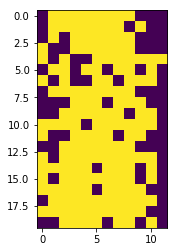

In [24]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.imshow(tc[0,:,:])